# NOISY Connect-4 RANDOM data generator V4
mistakes deliberately made

In [1]:
import numpy as np
import random
from tqdm.auto import tqdm
import time
import pandas as pd
from C4.c4_move_data_generator import *
import matplotlib.pyplot as plt

print("All dependencies imported successfully.")

All dependencies imported successfully.


In [2]:
maxDepth = 5
minDepth = 1
PLAYS = {}
N_games = 20
for game in range(N_games):
    A = random.randint(minDepth, maxDepth)
    B = random.randint(minDepth, maxDepth)
    label = f"L{A}L{B}"
    PLAYS[label] = {"A": A, "B": B, "games": random.randint(8, 10)}

PLAYS

{'L5L2': {'A': 5, 'B': 2, 'games': 9},
 'L5L5': {'A': 5, 'B': 5, 'games': 10},
 'L1L5': {'A': 1, 'B': 5, 'games': 8},
 'L5L3': {'A': 5, 'B': 3, 'games': 8},
 'L2L5': {'A': 2, 'B': 5, 'games': 10},
 'L1L4': {'A': 1, 'B': 4, 'games': 9},
 'L1L2': {'A': 1, 'B': 2, 'games': 8},
 'L1L1': {'A': 1, 'B': 1, 'games': 8},
 'L2L1': {'A': 2, 'B': 1, 'games': 9},
 'L3L3': {'A': 3, 'B': 3, 'games': 9},
 'L2L4': {'A': 2, 'B': 4, 'games': 9}}

In [3]:
#DATA_FILE = "DATA/C4.Lossy_play_data.xlsx"
DATA_FILE = "DATA/noisy_C4.L1L5_play_data.xlsx"

In [4]:
from tqdm.auto import tqdm
import pandas as pd

records = []
for label, cfg in tqdm(PLAYS.items()):
    CFG = {
        "noiseA": random.uniform(0.0001, 0.01),
        "noiseB": random.uniform(0.1, 0.5),
        "forceLoss": random.uniform(0.10, 0.75),
    }
    print(label, CFG)
    records.extend(generate_dataset({label: cfg}, seed=666, CFG=CFG))

df_new   = records_to_dataframe(records)   # columns: label, reward, game, ply, 0-0..5-6
df_saved = upsert_excel(df_new, DATA_FILE)
print("Saved", len(df_saved), "unique rows")

  0%|          | 0/11 [00:00<?, ?it/s]

L5L2 {'noiseA': 0.0036699741565996997, 'noiseB': 0.2630134803654554, 'forceLoss': 0.5631803136536753}
L5L5 {'noiseA': 0.0021032331184235088, 'noiseB': 0.29919568257121654, 'forceLoss': 0.7231841343506559}
L1L5 {'noiseA': 0.003951776829818072, 'noiseB': 0.49120077692239783, 'forceLoss': 0.4913516233233758}
L5L3 {'noiseA': 0.00044632455671739067, 'noiseB': 0.39881828192903757, 'forceLoss': 0.4974704870872748}
L2L5 {'noiseA': 0.00044632455671739067, 'noiseB': 0.39881828192903757, 'forceLoss': 0.4974704870872748}
L1L4 {'noiseA': 0.009770858110806925, 'noiseB': 0.29657403181037734, 'forceLoss': 0.5434281025467447}
L1L2 {'noiseA': 0.0021032331184235088, 'noiseB': 0.29919568257121654, 'forceLoss': 0.7231841343506559}
L1L1 {'noiseA': 0.00044632455671739067, 'noiseB': 0.39881828192903757, 'forceLoss': 0.4974704870872748}
L2L1 {'noiseA': 0.00044632455671739067, 'noiseB': 0.39881828192903757, 'forceLoss': 0.4974704870872748}
L3L3 {'noiseA': 0.0052492183188571715, 'noiseB': 0.38732785097288336, 'f

In [5]:
df_new[["reward"]].describe()

,reward
count,1232.000000
mean,92.346144
std,268.697774
min,-101.000000
25%,4.000000
50%,13.900000
75%,41.950000
max,1000.000000


In [6]:
df_saved[["reward"]].describe()

,reward
count,1232.000000
mean,92.346144
std,268.697774
min,-101.000000
25%,4.000000
50%,13.900000
75%,41.950000
max,1000.000000


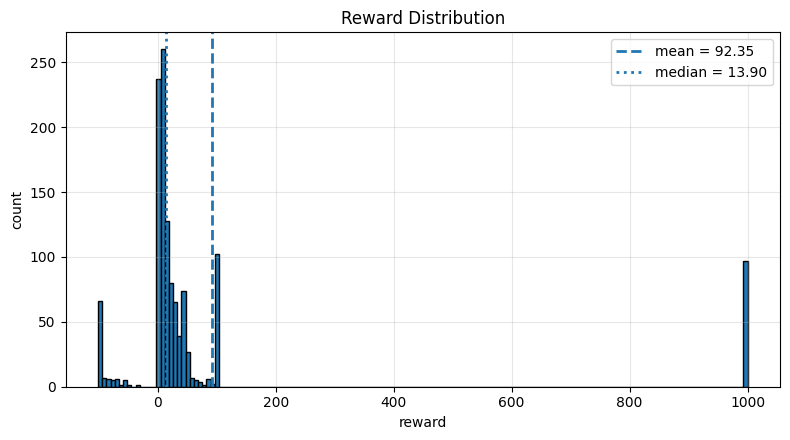

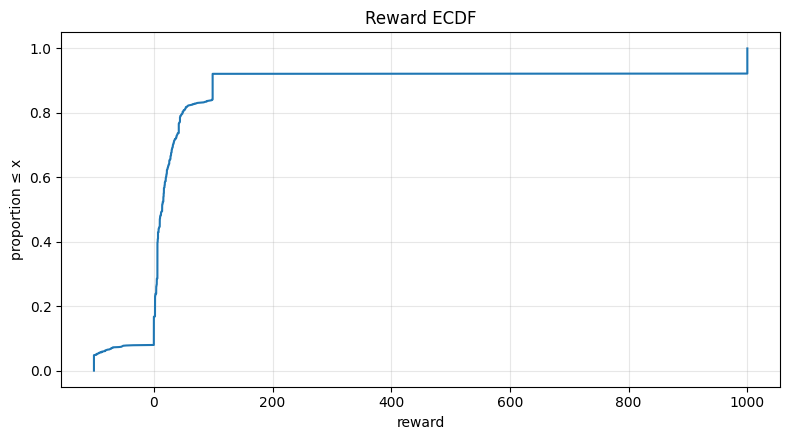

In [7]:
r = df_saved["reward"].astype(float).dropna()

# --- Histogram ---
fig, ax = plt.subplots(figsize=(8,4.5))
bins = np.arange(r.min()-0.5, r.max()+1.5, 1) if np.allclose(r, r.round()) else "auto"
n, bins, _ = ax.hist(r, bins=bins, edgecolor="black")
ax.axvline(r.mean(),   ls="--", lw=2, label=f"mean = {r.mean():.2f}")
ax.axvline(r.median(), ls=":",  lw=2, label=f"median = {r.median():.2f}")
ax.set(title="Reward Distribution", xlabel="reward", ylabel="count")
ax.grid(True, alpha=0.3)
ax.legend()
fig.tight_layout()

r_sorted = np.sort(r.values)
y = np.arange(1, len(r_sorted)+1) / len(r_sorted)
plt.figure(figsize=(8,4.5))
plt.plot(r_sorted, y)
plt.title("Reward ECDF")
plt.xlabel("reward")
plt.ylabel("proportion ≤ x")
plt.grid(True, alpha=0.3)
plt.tight_layout()
